# Behavior Analysis of Hydra

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import time

## 1. Load Data

In [25]:
# load contents from the .csv files

data1_ = []; data2_ = []; data3_= []

with open('data/testpoke4DeepCut_resnet50_testpoke4Mar14shuffle1_21000.csv', 'r') as f:
    reader = csv.reader(f)
    for item in reader:
        if reader.line_num == 1:
            continue
        data1_.append(item)
        
with open('data/testpoke5DeepCut_resnet50_hydratrackingMar12shuffle1_30000.csv', 'r') as f:
    reader = csv.reader(f)
    for item in reader:
        if reader.line_num == 1:
            continue
        data2_.append(item)
        
with open('data/testpoke2DeepCut_resnet50_testpoke2Mar14shuffle1_27000.csv', 'r') as f:
    reader = csv.reader(f)
    for item in reader:
        if reader.line_num == 1:
            continue
        data3_.append(item)

data_ = [data1_, data2_, data3_]        
        
# transform data 
del data1_[0:2]
data1 = np.double(np.array(data1_))
data1 = np.delete(data1, [0,3,6], axis=1)

del data2_[0:2]
data2 = np.double(np.array(data2_))
data2 = np.delete(data2, [0,3,6], axis=1)

del data3_[0:2]
data3 = np.double(np.array(data3_))
data3 = np.delete(data3, [0,3,6], axis=1)

In [46]:
length = np.max([len(data1),len(data2),len(data3)])
length2 = np.min([len(data1),len(data2),len(data3)])

In [54]:
data = np.zeros((length2, 3*4))

data[:,0:4] = data1[0:length2]
data[:,4:8] = data2[0:length2]
data[:,8:12] = data3[0:length2]

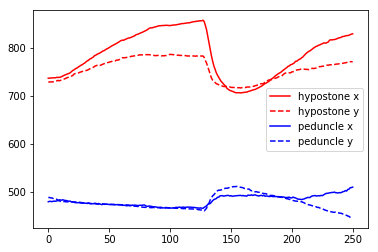

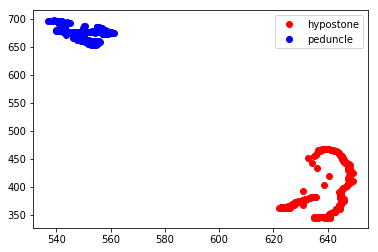

In [57]:
# plot coordinates
plt.figure()
plt.plot(data[:,4], 'r-', label='hypostone x')
plt.plot(data[:,5], 'r--', label='hypostone y')
plt.plot(data[:,6], 'b-', label='peduncle x')
plt.plot(data[:,7], 'b--', label='peduncle y')
plt.legend()
plt.show()

# plot trajectory 
plt.figure()
plt.plot(data[:,0], data[:,1], 'ro', label='hypostone')
plt.plot(data[:,2], data[:,3], 'bo', label='peduncle')
plt.legend()
plt.show()

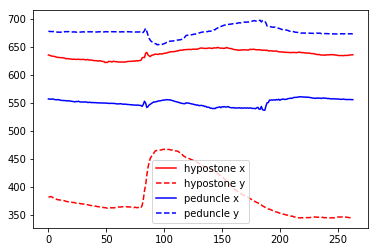

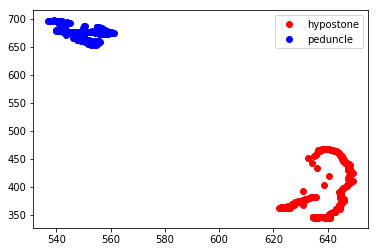

In [34]:
# plot coordinates
plt.figure()
plt.plot(data1[:,0], 'r-', label='hypostone x')
plt.plot(data1[:,1], 'r--', label='hypostone y')
plt.plot(data1[:,2], 'b-', label='peduncle x')
plt.plot(data1[:,3], 'b--', label='peduncle y')
plt.legend()
plt.show()

# plot trajectory 
plt.figure()
plt.plot(data1[:,0], data1[:,1], 'ro', label='hypostone')
plt.plot(data1[:,2], data1[:,3], 'bo', label='peduncle')
plt.legend()
plt.show()